In [ ]:
# Imports
import time
import json
import matplotlib.pyplot as plt
from tqdm import tqdm

tests = range(1, 5000, 100)

## Versions


### Version 1 - Iterative unoptimized


In [ ]:
def PascalTriangle1(line: int):
    if line == 1:
        return [1]
    cur = [1, 1]

    for _ in range(2, line):
        new = [1]
        for i in range(len(cur) - 1):
            new.append(cur[i] + cur[i + 1])
        new.append(1)
        cur = new
    return cur

### Version 2 - Iterative w/ in place memory allocation


In [ ]:
def PascalTriangle2(line: int):
    if line == 1:
        return [1]
    cur = [1, 1]

    for _ in range(2, line):
        for i in range(len(cur) - 1):
            cur[i] += cur[i + 1]
        cur = [1] + cur
    return cur

### Version 3 - Version 3 but more memory efficient


In [ ]:
def PascalTriangle3(line: int):
    if line == 1:
        return [1]
    cur = [1, 1]

    for _ in range(2, line):
        for i in range(len(cur) - 1, 0, -1):
            cur[i] += cur[i - 1]
        cur += [1]
    return cur

## Measuring


In [ ]:
def measure(func, tries, max_t):
    file = func.__name__ + ".json"
    try:
        with open(file, "r") as f:
            data = json.loads(f.read())
            if (
                data["x"] == list(tests)
                and data["tries"] == tries
                and data["max"] == max_t
            ):
                return data["y"]
    except:
        pass

    times = []
    for n in tqdm(tests, leave=False):
        total = 0
        for _ in range(tries):
            start = time.time()
            func(n)
            end = time.time()
            total += end - start
        t = total / tries
        times.append(t)

        if t > max_t:
            break

    with open(file, "w") as f:
        data = {"x": list(tests), "y": times, "tries": tries, "max": max_t}
        f.write(json.dumps(data, indent=3))


    return times

In [ ]:
times_1 = measure(PascalTriangle1, 5, 3)
times_2 = measure(PascalTriangle2, 5, 3)
times_3 = measure(PascalTriangle3, 5, 3)

## Graph


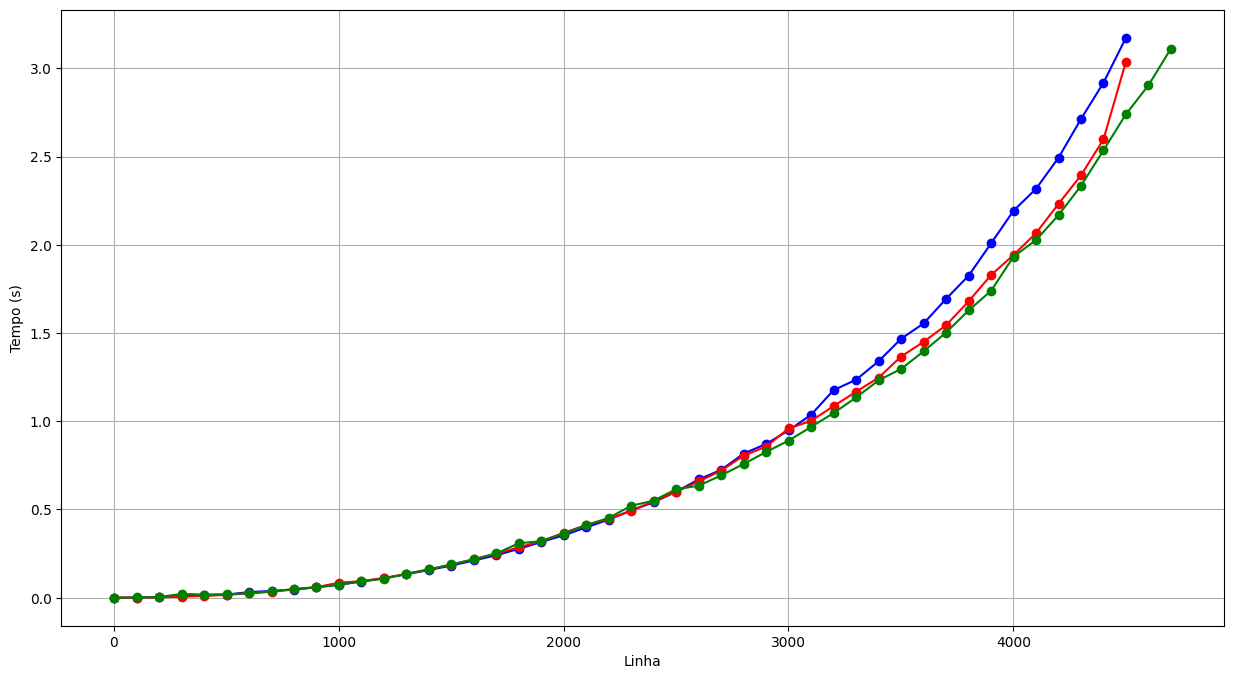

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(tests[: len(times_1)], times_1, marker="o", color="b")
plt.plot(tests[: len(times_2)], times_2, marker="o", color="r")
plt.plot(tests[: len(times_3)], times_3, marker="o", color="g")
plt.xlabel("Linha")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.show()